In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from ch_3_metrics import *

In [2]:
advertising_data = pd.read_csv('data/advertising.csv', index_col=[0])

In [3]:
ad_types = advertising_data.columns[0:3] # wide to long
advertising_data_long = pd.melt(
    advertising_data,
    value_vars=ad_types, 
    var_name='advertising_type',
    value_name='amount_spent',
    id_vars='sales'
)

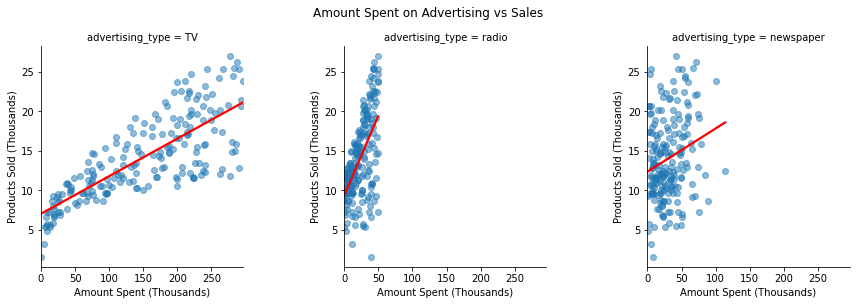

In [4]:
sales_grid = sns.FacetGrid(
    advertising_data_long, 
    col='advertising_type', 
    # sharex=False,
    sharey=False,
    height=4
)
sales_grid = sales_grid.map(
    sns.regplot,
    'amount_spent', 
    'sales', 
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}, 
    ci=False
)
sales_grid.set(xlabel='Amount Spent (Thousands)', ylabel='Products Sold (Thousands)')

plt.suptitle('Amount Spent on Advertising vs Sales', y=1.05)
plt.subplots_adjust(wspace=0.5)
plt.show()

In [5]:
# evaluate regression on single predictors
X = {ad_type: advertising_data.loc[:, ad_type].to_numpy() for ad_type in ad_types}
y = advertising_data.loc[:, 'sales'].to_numpy()

for ad_type in X:
    X[ad_type] = sm.add_constant(X[ad_type])
    linear_model = sm.OLS(endog=y, exog=X[ad_type])
    results = linear_model.fit()
    
    rse, r_squared, f_statistic = get_metrics(results)
    
    print('Type of Advertisement:', ad_type)
    print(results.summary().tables[1])
    display_metrics(rse, r_squared, f_statistic)

Type of Advertisement: TV
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
x1             0.0475      0.003     17.668      0.000       0.042       0.053
Residual Standard Error: 3.26
R Squared: 0.61
F Statistic: 312.14

Type of Advertisement: radio
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.000       8.202      10.422
x1             0.2025      0.020      9.921      0.000       0.162       0.243
Residual Standard Error: 4.27
R Squared: 0.33
F Statistic: 98.42

Type of Advertisement: newspaper
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------